## Input Parameters

In [30]:

#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

# Import all the libraries needed
from import_dep import *
# Import custom plot style and colorbar functions
from Functions_style import set_plot_style, add_colorbar, generate_colormaps_and_normalizers, add_slide, sample_tag_gen
# Import the data import functions 
from Class_Import import PPMSData, import_ppms_data, import_all_datasets
# Import the general functions
from Functions_General import extract_ctf, magnetoresistance, update_plot_string, filter_data
# Import the functions for VDP processing
from Functions_VDP import vdp_resistivity, vdp_hall
# Import the functions used for HallBar processing
from Functions_HallBar import hallbar_resistivity, hallbar_hall

# import the fitting functions
from Functions_Fitting import poly_to_string

### Plotting and Output Variables 
export_data = False # set to True to export the data to a powerpoint presentation and as svg files and export to path_out
powerpoint_string = 'N2anneal' # string to be added to the powerpoint file name
fig_format = 'svg' # format of the figure to be saved
plot_transparency = True # set to True to make the data plots transparent
fig_list = [] # Create a list to flexibly store tuples with the (figure, filename, title) for later exporting
ohm_m = 0 #set to 1 to force ohm-m units 0 to keep micro ohm cm units



# Custom Scence style settings for figures
fig_size = set_plot_style(export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])

# Import all the raw measured data for VDP and HallBar
dat_raw_vdp, dat_raw_hb = import_all_datasets()

File 1 imported: JT029_SrRuO3_silver_Combined with shape (650, 5, 6)
File 2 imported: JT029_SrRuO3_silver_Combined4 with shape (7920, 5, 6)
File 3 imported: JT029_SrRuO3_silver_Combined_fullrange.txt with shape (850, 5, 6)
File 4 imported: JT029_SrRuO3_silver_HallRun1 with shape (72, 5, 6)
File 5 imported: JT029_SrRuO3_silver_Halltest2 with shape (68, 5, 6)
File 1 imported: HC003_BaSnO3_STO_061124_Hall with shape (3024, 5, 6)
File 1 imported: YF042_HfO2_STO_nosilver_Hall_2 with shape (3660, 5, 6)
File 2 imported: YF042_HfO2_STO_silver_Hall_3 with shape (2970, 5, 6)
File 3 imported: YF042_HfO2_STO_silver_Hall_5 with shape (2508, 5, 6)
File 4 imported: YF042_HfO2_STO_silver_Hall_6 with shape (2442, 5, 6)
File 5 imported: YF042_HfO2_STO_silver_Hall_7 with shape (3080, 5, 6)
Error with file: YFW042_HZO_IV_resistivity.png, 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
File 1 imported: DR001_LaScO3__BaSnO3_STO_201124_test1 with shape (22, 5, 6)
File 2 imported: DR004

## Instrument Applied Current Approximation
- Keep below this level to prevent joule heating based off the two terminal resistance

In [31]:

R_approx = (2e5)
a = (1000*R_approx)**(-0.5)
print(f'Use Current < {a:.1e} A')

Use Current < 7.1e-05 A


## Select Data for Plotting ***********************************************

In [32]:
# First visualise the data contained in each list
for count, dat in enumerate(dat_raw_vdp+dat_raw_hb):
    print(f'dat_{count}:', [f'{count_2}={d.filename}' for count_2, d in enumerate(dat)])


# Select the data sets to be plotted and put into a single list

#dat_raw_sel = [dat_raw_vdp[0][2], dat_raw_vdp[0][0], dat_raw_vdp[0][1]] # JT029
#dat_raw_sel = [dat_raw_vdp[20][0],dat_raw_vdp[20][5]] # JT082

#dat_raw_sel = [dat_raw_vdp[3][1]] # DR001
#dat_raw_sel = [dat_raw_vdp[4][5], dat_raw_vdp[4][7], dat_raw_vdp[4][9]] # , dat_raw_vdp[4][10], dat_raw_vdp[4][11],dat_raw_vdp[4][12]] # DR003
#dat_raw_sel = [dat_raw_vdp[3][0],dat_raw_vdp[3][1], dat_raw_vdp[3][2], dat_raw_vdp[3][3]] # DR004
#dat_raw_sel =  [dat_raw_vdp[14][5], dat_raw_vdp[14][1], dat_raw_vdp[14][7]]#, dat_raw_vdp[14][2]] # DR008a
#dat_raw_sel = [dat_raw_vdp[17][11],dat_raw_vdp[17][10], dat_raw_vdp[17][1], dat_raw_vdp[17][0], dat_raw_vdp[17][6],dat_raw_vdp[17][5],dat_raw_vdp[17][4], dat_raw_vdp[17][2]]# DR009
#dat_raw_sel = [ dat_raw_vdp[18][2], dat_raw_vdp[18][0], dat_raw_vdp[18][3] ] # DR010
#dat_raw_sel = [dat_raw_vdp[21][6], dat_raw_vdp[21][4], dat_raw_vdp[21][3]]#, dat_raw_vdp[21][4], ] # DR011
#dat_raw_sel = [ dat_raw_vdp[19][4], dat_raw_vdp[19][3], dat_raw_vdp[19][2]]#, dat_raw_vdp[19][0]] # DR012
#dat_raw_sel = [ dat_raw_vdp[21][0], dat_raw_vdp[19][4], dat_raw_vdp[19][3], dat_raw_vdp[17][4] , dat_raw_vdp[18][1],dat_raw_vdp[18][3],dat_raw_vdp[18][0], dat_raw_vdp[14][5], dat_raw_vdp[14][1], dat_raw_vdp[14][7]] # DR Combined

#dat_raw_sel = [dat_raw_vdp[2][3] , dat_raw_vdp[2][2],  dat_raw_vdp[2][4], dat_raw_vdp[2][1]] # YFW042
#dat_raw_sel = [dat_raw_vdp[8][1], dat_raw_vdp[8][2]]    #,dat_raw_vdp[2][4],dat_raw_vdp[2][5]] YFW044
#dat_raw_sel = [ dat_raw_vdp[9][1], dat_raw_vdp[9][2], dat_raw_vdp[9][4]] #YFW046
#dat_raw_sel = [dat_raw_vdp[2][1], dat_raw_vdp[2][2], dat_raw_vdp[2][3], dat_raw_vdp[2][4], dat_raw_vdp[8][1], dat_raw_vdp[8][2], dat_raw_vdp[9][4]] # YFW Combined

#dat_raw_sel = dat_raw_vdp[1] # HC003
dat_raw_sel = [dat_raw_vdp[22][12],dat_raw_vdp[22][9],dat_raw_vdp[22][7],dat_raw_vdp[10][0],dat_raw_vdp[17][1]]#, dat_raw_vdp[10][4]] # HC011 ********* THE CURRENT IS INVERTED FOR THIS SAMPLE!!! **********
#dat_raw_sel = [dat_raw_vdp[11][0],dat_raw_vdp[11][4]] #,dat_raw_vdp[11][5]] # HC013
#dat_raw_sel = [dat_raw_vdp[12][3], dat_raw_vdp[12][0],dat_raw_vdp[12][1],dat_raw_vdp[12][2]] # HC014
#dat_raw_sel = [dat_raw_vdp[23][1],dat_raw_vdp[23][0],dat_raw_vdp[23][2]] #HC016
#dat_raw_sel = [dat_raw_vdp[16][1]]  #HC015
#dat_raw_sel = [dat_raw_vdp[15][1], dat_raw_vdp[11][0],dat_raw_vdp[11][4],dat_raw_vdp[10][0], dat_raw_vdp[10][4],dat_raw_vdp[16][1]] # HC Combined


# ------Saketh IBM Data ----
#dat_raw_sel = [dat_raw_vdp[23][0]] # SR003_S - high hydrogen
#dat_raw_sel = [dat_raw_vdp[23][3],dat_raw_vdp[23][1]] # SR003_S - high hydrogen

# 2DEG combined
#dat_raw_sel = [dat_raw_vdp[20][0],dat_raw_vdp[18][1],dat_raw_vdp[18][3],dat_raw_vdp[18][0],dat_raw_vdp[17][4],dat_raw_vdp[10][0], dat_raw_vdp[10][4], dat_raw_vdp[4][7], dat_raw_vdp[2][4], dat_raw_vdp[2][1], dat_raw_vdp[8][1],dat_raw_vdp[9][4], dat_raw_vdp[11][0],dat_raw_vdp[11][4],dat_raw_vdp[14][1],dat_raw_vdp[16][1], dat_raw_vdp[15][1]] 


#dat_raw_sel = [dat_raw_vdp[13][5], dat_raw_vdp[13][2], dat_raw_vdp[13][3]] # DV127

print('dat_raw_sel:', [f'{count}={d.filename}' for count, d in enumerate(dat_raw_sel)])


dat_0: ['0=JT029_SrRuO3_silver_Combined', '1=JT029_SrRuO3_silver_Combined4', '2=JT029_SrRuO3_silver_Combined_fullrange.txt', '3=JT029_SrRuO3_silver_HallRun1', '4=JT029_SrRuO3_silver_Halltest2']
dat_1: ['0=HC003_BaSnO3_STO_061124_Hall']
dat_2: ['0=YF042_HfO2_STO_nosilver_Hall_2', '1=YF042_HfO2_STO_silver_Hall_3', '2=YF042_HfO2_STO_silver_Hall_5', '3=YF042_HfO2_STO_silver_Hall_6', '4=YF042_HfO2_STO_silver_Hall_7']
dat_3: ['0=DR001_LaScO3__BaSnO3_STO_201124_test1', '1=DR004_LaScO3__BaSnO3_STO_201124_combined3', '2=DR004_LaScO3__BaSnO3_STO_201124_combined4', '3=DR004_LaScO3__BaSnO3_STO_201124_combined5', '4=DR004_LaScO3__BaSnO3_STO_201124_combined6', '5=DR004_LaScO3__BaSnO3_STO_201124_test2']
dat_4: ['0=DR003_LaScO3__BaSnO3_STO_nosilver_combined1', '1=DR003_LaScO3__BaSnO3_STO_nosilver_combined2', '2=DR003_LaScO3__BaSnO3_STO_nosilver_test2', '3=DR003_LaScO3__BaSnO3_STO_nosilver_test3', '4=DR003_LaScO3__BaSnO3_STO_nosilver_test4', '5=DR003_LaScO3__BaSnO3_STO_silver_combined10', '6=DR003_LaSc

## ************************************************************************************************************************

## Extract and Check Temperature, Field, and Current values

In [33]:
# Reduced_data = [1,-5] means that the first and last 5 temperature points are removed from the data
# Reduced_temp = [3,-1] will skip the first 3 temperature points and the last 1 temperature point
# Reduced_current = 2 will skip the first 2 current points and the last 2 current points

# Extract Data - check you have the expected and correct Temperature, Field and Current values!
dat, unit_scale = extract_ctf(dat_raw_sel,Reduced_temp = False, Reduced_current=False, ohm_m=ohm_m)


# Update a single data file with reduced temperature or current values
#dat[1] = extract_ctf([dat_raw_sel[1]], Reduced_temp = [1,0], Reduced_current=False)[0][0]
#dat[3] = extract_ctf([dat_raw_sel[3]], Reduced_temp = [0,-2], Reduced_current=False)[0][0]

# Generate the colormaps and normalizers for the data
[cmap_temp, cmap_field, norm_temp, norm_field, mark_p, min_temp, max_temp, min_field, max_field] = generate_colormaps_and_normalizers(dat)

# If exporting the data this ensures that the labels are updated by the user to be correct from their original "filename" assignement
if export_data == True: 
    dat = update_plot_string(dat)



Warning for HC011tt_BSO_LSO_LaSSO_STO_nosilver_N2annealed_run9: no recognised field order for reordering was applied.
Field values start/mid/end: 2.8542e-06, -8.999978906199999, -8.999978906199999
For file: HC011tt_BSO_LSO_LaSSO_STO_nosilver_N2annealed_run9
9 Currents (uA): [-1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6]
1 Temperatures (K): [322.]
2 Fields (kOe): [  0. -90.]
Is this correct?
tempshape 2
WARNING Potential Temperature Issues: The erronous temperature points are: [281. 321.]
HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run8: Field values originally in the order 0,-Bmax->0->Bmax
For file: HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run8
9 Currents (uA): [-1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6]
21 Temperatures (K): [  2.  22.  42.  62.  82. 102. 122. 142. 162. 182. 202. 222. 242. 262.
 282. 302. 322. 342. 362. 382. 402.]
14 Fields (kOe): [-90. -75. -60. -45. -30. -15.  -0.  -0.  15.  30.  45.  60.  75.  90.]
Is this correct?
Warning for HC011_BSO_LSO_LaSSO_STO_nosilver_

## Calculate VDP Resistivity, Magnetoresistance, Hall Coefficient and Hall Mobility
- Calculated with separate functions depending on if it is a Van der Pauw measurement or using a HallBar


In [34]:
# Extract the resistivity using the VDP method and write to the PPMSData objects in the list "dat" - skips all non VDP data
dat = vdp_resistivity(dat, print_val = False, resistivity_guess = 0)
# Calculate the Hall coefficient and mobility - skips all non VDP data
dat = vdp_hall(dat)

# Calculate the resistivity using the HallBar method and write to the PPMSData objects in the list "dat" - skips all non HallBar data
dat = hallbar_resistivity(dat, print_val = False, filt_kern=0)
# calculate the Hall coefficient and mobility - skips all non HallBar data
dat = hallbar_hall(dat, filt_kern=0)
        
# Calculate the magnetoresistance at each temperature and field strength: mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
dat = magnetoresistance(dat)   
    


/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/EPOTFvenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10919: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/EPOTFvenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10933: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/EPOTFvenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10936: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


## Plot IV data to Check Linearity of Resitivity Measurements
- divide the sheet resistance by approx 5 to give the two terminal resistance to estimate the voltage the current source is applying

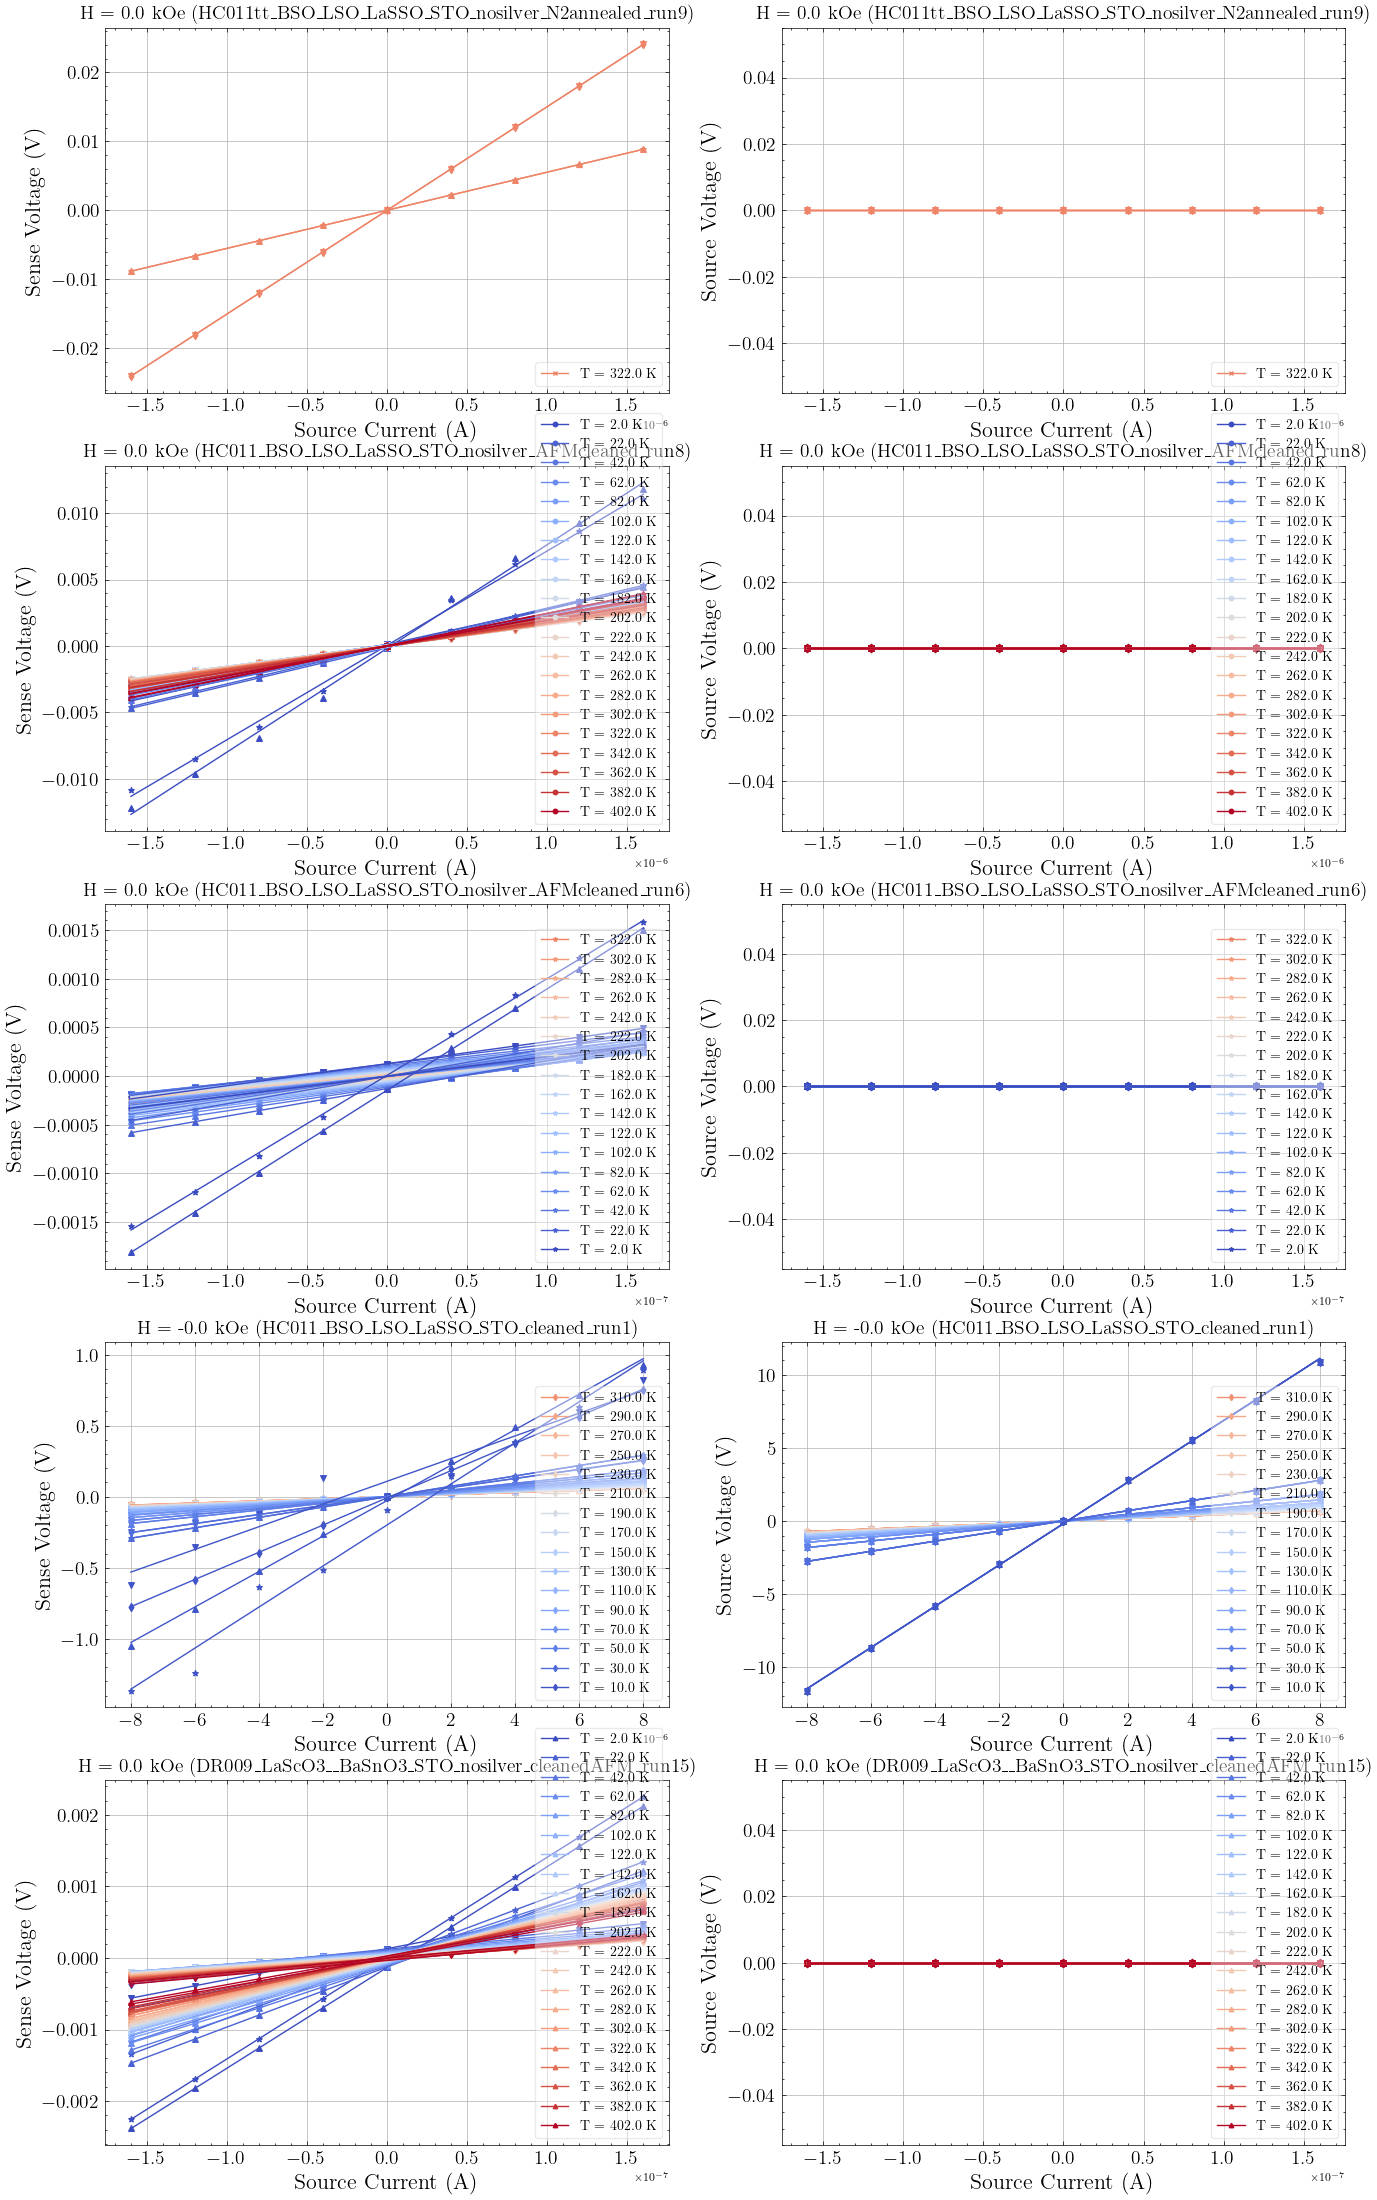

In [35]:
fig = plt.figure(figsize=(16, 5.5*len(dat)))
gs = fig.add_gridspec(len(dat), 2)
labels = ['index_3', 'index_4', 'index_5', 'index_6']
color_s = ['r', 'g', 'b', 'm'] # simple four colors for the 4 configurations of vdp

# Loop over the data sets
for j, d in enumerate(dat):
    
    ax = fig.add_subplot(gs[j, 0])
    ax1 = fig.add_subplot(gs[j, 1])
    
    # Select the range for either 'VDP' or 'HallBar' data
    dat_range = [2, 3, 4, 5] if d.measurement_type == 'VDP' else [0, 1]

    # Select the B field that you want to plot
    Bi = int( (d.ctf[5]/2)-1 )
    
    # Loop over the temperatures
    for Ti in range(d.ctf[4]):
        # Loop over the four index configurations
        for i in dat_range:  
            
            ## Plotting Source(I) vs Sense(V) data
            R_test = linregress(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 4, i])
            ax.scatter(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 4, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])), marker=mark_p[i])
            ax.plot(d.data_np_nd[Ti, Bi, :, 2, i], R_test.intercept + R_test.slope * d.data_np_nd[Ti, Bi, :, 2, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])))
        
            ## Plotting Source(I) vs Source(V) data
            R_test_2 = linregress(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 3, i])
            ax1.scatter(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 3, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])), marker=mark_p[i])
            ax1.plot(d.data_np_nd[Ti, Bi, :, 2, i], R_test_2.intercept + R_test_2.slope * d.data_np_nd[Ti, Bi, :, 2, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])))
        
        
        # Add dummy plots for the legend entry
        ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(d.ctf[1][Ti])), label=f'T = {d.ctf[1][Ti]} K')
        ax1.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(d.ctf[1][Ti])), label=f'T = {d.ctf[1][Ti]} K')
        
    ax.legend(loc='lower right', fontsize=10, markerscale=0.8, framealpha=0.4)
    ax1.legend(loc='lower right', fontsize=10, markerscale=0.8, framealpha=0.4)
    
    # Set labels and title
    ax.set_xlabel('Source Current (A)', fontsize = 16)
    ax.set_ylabel('Sense Voltage (V)', fontsize = 16)
    ax.set_title(f'H = {np.round(d.data_np_nd[Ti, Bi, 0, 1, 2],decimals=0)*10} kOe ({d.plot_str})', fontsize=14)
        

    # Set labels and title
    ax1.set_xlabel('Source Current (A)', fontsize = 16)
    ax1.set_ylabel('Source Voltage (V)', fontsize = 16)
    ax1.set_title(f'H = {np.round(d.data_np_nd[Ti, Bi, 0, 1, 2],decimals=0)*10} kOe ({d.plot_str})', fontsize=14)

    ax.tick_params(axis='both', which='major', labelsize=14)  
    ax1.tick_params(axis='both', which='major', labelsize=14) 

    #ax.set_ylim(-1,1)
    #ax.set_ylim(-5e-4,5e-4)

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_IV_resistivity' # name for exported figure
plot_title = 'Plot IV data from Resistivity Measurement to Check Linearity' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

## R-squared Analysis to Check Linearity of I-V data

average R-squared for HC011tt_BSO_LSO_LaSSO_STO_nosilver_N2annealed_run9 = 0.999999827573605
average R-squared for HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run8 = 0.9999455315913677
average R-squared for HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run6 = 0.9999903624980613
average R-squared for HC011_BSO_LSO_LaSSO_STO_cleaned_run1 = 0.9990410215523384
average R-squared for DR009_LaScO3__BaSnO3_STO_nosilver_cleanedAFM_run15 = 0.9999986137229764


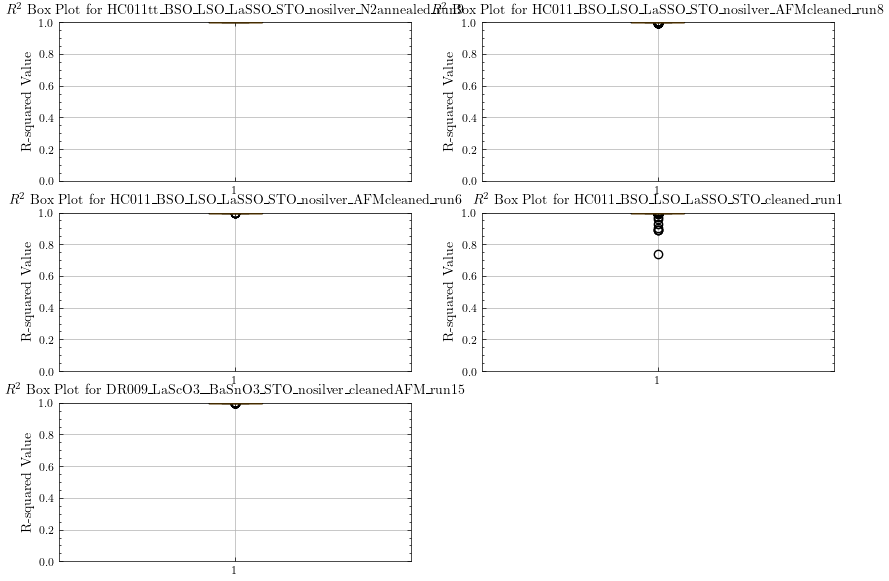

In [36]:
fig = plt.figure(figsize=(10, 3*len(dat) // 2))
gs = fig.add_gridspec(1+len(dat) // 2, 2)

for j, d in enumerate(dat):
    #for i in range(len(d.R_squared_res)):
        #print(f'{d.filename}T={d.ctf[1][i//4]}, config = {i %4 } R-squared = {d.R_squared_res[i]}') - only works for zero field at the moment
    
    
    print(f'average R-squared for {d.filename} =', sum(d.R_squared_res) / len(d.R_squared_res))
    ax = fig.add_subplot(gs[j // 2, j % 2])
    
    # Plot R-square values in a boxplot
    # Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
    ax.boxplot(d.R_squared_res)
    ax.set_title(f'$R^2$ Box Plot for {d.plot_str}')
    ax.set_ylabel('R-squared Value')
    ax.set_ylim(0, 1)  # If needed, you can set x-axis limits too

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_IV_Rsq_boxplot' # name for exported figure
plot_title = 'R-squared Analysis to Check Linearity of I-V Resistivity data' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

## Resistivity Configuration Compararison 
Comparing the resistivity in configuration A and B which are inverted versions of one another (e.g. source meter and sense meter swapped positions)
This is a good check for any systematic errors

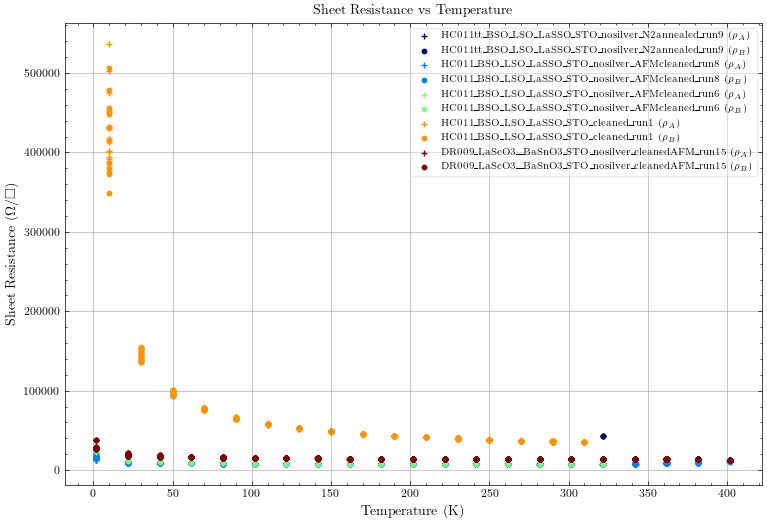

In [37]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

c_val = plt.cm.jet(np.linspace(0,1,len(dat)))


# Loop over the data sets
for j, d in enumerate(dat):
    
    # Flatten the resistivity data
    res_data_flat = d.res_data.reshape((d.ctf[4]*d.ctf[5],6))  
    
    # Plot R_sheet_A vs Temp
    ax.scatter(res_data_flat[:,0], res_data_flat[:,2] * unit_scale, marker='+', color=c_val[j], label=f'{d.plot_str} ($\\rho_A$)')

    # Plot R_sheet_B vs Temp
    ax.scatter(res_data_flat[:,0], res_data_flat[:,3] * unit_scale, marker='o', s=10, color=c_val[j], label=f'{d.plot_str} ($\\rho_B$)')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
    ax.set_title(r'Sheet Resistance vs Temperature')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title(r'Resistivity vs Temperature')
    
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
    ax.set_title(r'Resistivity vs Temperature')

# Add a legend
ax.legend()

#ax.set_yscale('log')
#ax.set_ylim(2e4, 5e4)
#ax.set_xlim(0, 330)
# Show the plot

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xx_A_vs_B' # name for exported figure
plot_title = 'Resistivity Configuration Comparison' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag
# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

## Resistivity vs Temperature

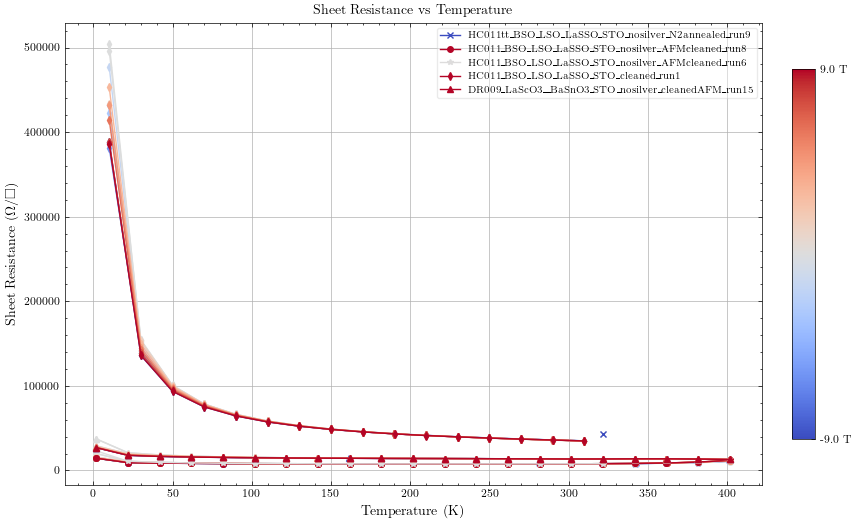

In [38]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig, gs[1], sm, min_field, max_field, fig_size)


# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the B fields
    for Bi in range(d.ctf[5]):
        
        # Plot rho_film vs Temp
        ax.plot(d.res_data[:,Bi, 0], d.res_data[:,Bi, 4] * unit_scale, marker=mark_p[j], color=cmap_field(norm_field(d.res_data[0, Bi, 1])))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color=cmap_field(norm_field(d.res_data[0, Bi, 1])), label=f'{d.plot_str}')
    
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
    ax.set_title(f'Sheet Resistance vs Temperature')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title('Resistivity vs Temperature')
    
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
    ax.set_title('Resistivity vs Temperature')

# Add a legend
ax.legend()


#ax.set_xlim(0,3)
#ax.set_ylim(1e5, 4e6)
#ax.set_ylim(1e3, 2e4)
# ax.set_yscale('log')


# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xx_vs_temperature' # name for exported figure
plot_title = 'Resistivity vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

- Anderson localisation causes the metal insulator transition at low T
- If you have defects in film, they can have an external effect of localising charge carriers and reducing the conductivity
    - Also causes loss of metalicity beneath a certain thicknes of LSMO etc
    -  Defects localise the previously delocalised charge carriers, either due to thickness reudction or low T
    - Low thicknes its because number of defects is constant - > higher defect density
    

## Resitivity vs Temperature for B=0 ONLY

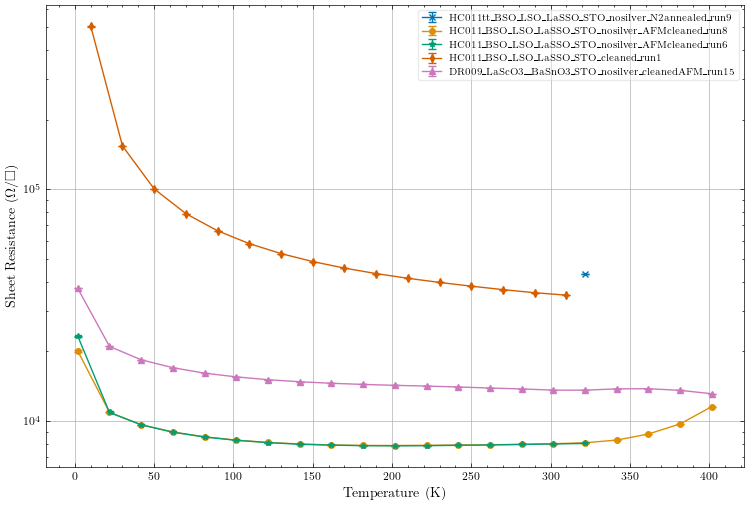

In [39]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over a single B field
    for Bi in  [int(d.ctf[5]/2)]: 

        # Plot errorbar scaling the error by unit scale as well
        ax.errorbar(d.res_data[:, Bi, 0], d.res_data[:, Bi, 4] * unit_scale, yerr = d.res_data[:, Bi, 5] * unit_scale,fmt='-'+mark_p[j], capsize=3, label=f'{d.plot_str}')
      
    # Create a DataFrame with the x and y data
    #df = pd.DataFrame({'Temperature (K)': d.res_data[:, Bi, 0], 'Resistivity': d.res_data[:, Bi, 4] * unit_scale})
    # Write the DataFrame to an Excel file
    #df.to_excel(f'{d.filename}_data.xlsx', index=False)

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')

# Add a legend
ax.legend()

#ax.set_xlim(0,0.3)
#ax.set_ylim(1e5, 4e6)
#ax.set_ylim(136.4, 137)
ax.set_yscale('log')



# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xx_H0_vs_temperature' # name for exported figure
plot_title = 'Resistivity vs Temperature at H=0' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

## Resistivity vs H

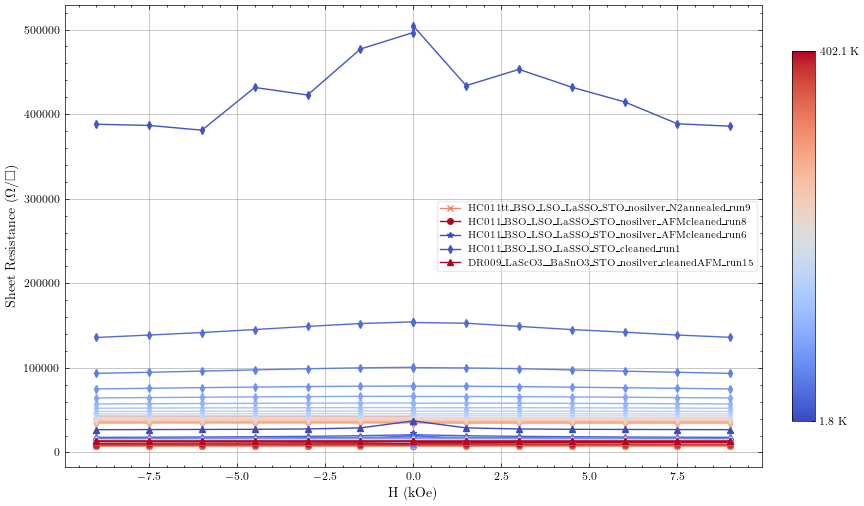

In [40]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field = False)




# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the temperatures
    for Ti, T in enumerate(d.ctf[1], start=0):      
            
            ax.plot(d.res_data[Ti, :, 1], d.res_data[Ti, :, 4] * unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)))
            #ax.plot(d.res_data[Ti, :, 1], d.res_data[Ti, :, 3] * unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)), linestyle=':')
    
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(T)), label=f'{d.plot_str}')
        
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('H (kOe)')   
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title(r'Resistivity vs Field')
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
    ax.set_title(r'Resistivity vs Field')

ax.legend()


#ax.set_xlim(-0.0001, 0.0001)

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_resistivity_vs_field' # name for exported figure
plot_title = 'Resistivity vs Field' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

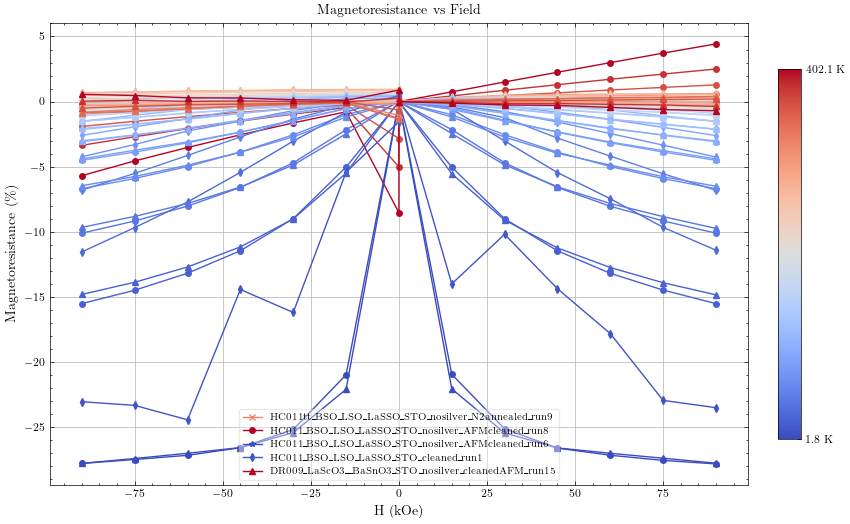

In [41]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field = False)


# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the temperatures
    for Ti, T in enumerate(d.ctf[1], start=0):  
            # Add a plot of magnetoresistance vs field strength for each loop of temperature (excluding last field point which is repeat of B=0)
            ax.plot(d.tf_av[Ti,:,1] * 10, d.mag_res[Ti, :, 2], marker=mark_p[j], color=cmap_temp(norm_temp(T)))
            #ax.plot(d.tf_av[Ti,:,1] * 10, d.mag_res[Ti, :, 1]-d.mag_res[Ti, :, 0], marker=mark_p[j], color=cmap_temp(norm_temp(T)), linestyle=':')
            
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(T)), label=f'{d.plot_str}')
    #ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(T)), label=f'{d.filename}(configA-configB)', linestyle=':')
        
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'Magnetoresistance (\%)')
ax.set_title(f'Magnetoresistance vs Field')
ax.legend()

#ax.set_ylim(-8, 2)

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_magnetoresistance_vs_field' # name for exported figure
plot_title = 'Magnetoresistance Vs Field' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

- The longitudinal resistance exhibits a rapid decrease, attributed to weak localization (WL), a phenomenon commonly observed in  disordered semiconductor systems
- The magnetoresistance (MR) exhibited a parabolic behavior within the intermediate magnetic field range (1.5T to 4T), as illustrated in Figure 5(b). Concurrently, at the fields where SdH oscillations emerge, it indicates the onset of quantum effects that dominate over the classical parabolic behavior.
-  weak localization effect manifests itself much more strongly in low-dimensional systems (films and wires)

## Magnetoresistance Vs T
- Now looking at how the Magnetoresitance at a set field strength varies over temperature
- Displaying this for VDP configuration A, VDP configuration B and the average of the two

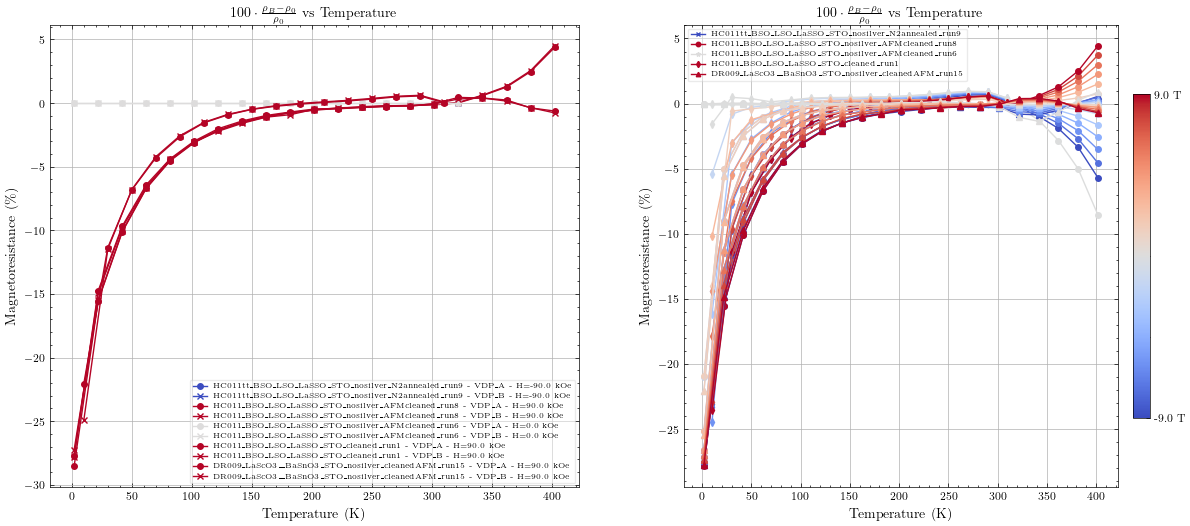

In [42]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(121)  # Create two subplots
ax2 = fig.add_subplot(122)  

# Sub_plot 1: Comparing configurations A and B
for j, d in enumerate(dat):
    
    #### Sub plot 1: Comparing the magnetoresistance vs T for configurations A vs B
    
    Bi_max = int(d.ctf[5])-1

    # Plot the magnetoresistance for the maximum positive field strength vs zero field
    ax.plot(d.ctf[1], d.mag_res[:, Bi_max, 0], marker='o', color=cmap_field(norm_field(d.ctf[2][Bi_max])), label=f'{d.plot_str} - VDP_A - H={np.round(d.ctf[2][Bi_max]*10, 0)} kOe')
    ax.plot(d.ctf[1], d.mag_res[:, Bi_max, 1], marker='x', color=cmap_field(norm_field(d.ctf[2][Bi_max])), label=f'{d.plot_str} - VDP_B - H={np.round(d.ctf[2][Bi_max]*10, 0)} kOe')


    #### Sub plot 2: Comparing the average magnetoresistance vs T for various field strengths 
    # Loop over the field values    
    for Bi, B in enumerate(d.ctf[2], start=0):
        ax2.plot(d.tf_av[:,Bi_max,0], d.mag_res[:, Bi, 2], marker=mark_p[j], color=cmap_field(norm_field(B)))     
    
    # Add a dummy plot for the legend entry
    ax2.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(B)), label=f'{d.plot_str}')
    

ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Magnetoresistance (\%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend(loc='best', fontsize = 'xx-small', framealpha=0.4)
        
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Magnetoresistance (\%)')
ax2.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
# Add a legend outside the plot
ax2.legend(loc='best', fontsize='xx-small', markerscale=0.8, framealpha=0.4)

#ax2.set_ylim(-10, 100)
#ax2.set_xlim(0, 50)

# Create a ScalarMappable and add a colorbar
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
cbar = plt.colorbar(sm, ax=ax2,  pad=0.03, shrink=0.7)
cbar.set_ticks([min_field, max_field])
cbar.set_ticklabels([f'{min_field:.1f} T', f'{max_field:.1f} T'])

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_magnetoresistance_vs_temperature' # name for exported figure
plot_title = 'Magnetoresistance Vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes))

## Arhenius Plot

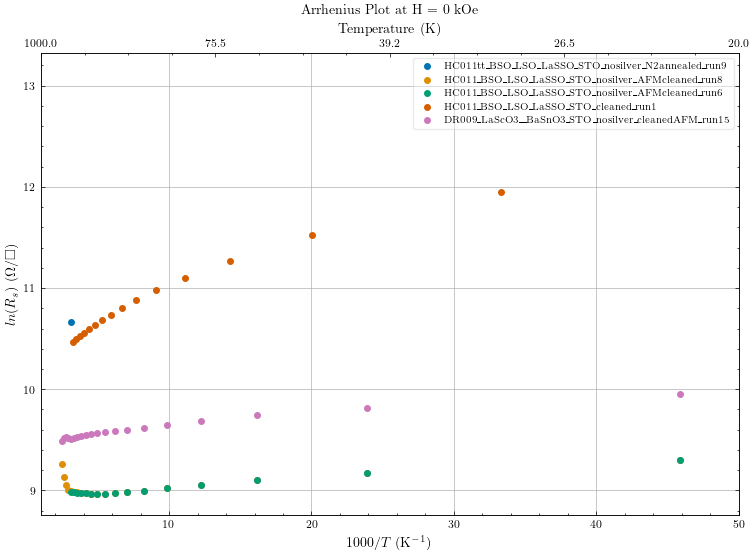

In [43]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Plot rho_film vs 1000/Temp
    Bi_zero = int(d.ctf[5]/2)-1
    ax.scatter(1000 / d.res_data[:, Bi_zero, 0], np.log(d.res_data[:, Bi_zero, 4]), marker='o', linestyle='-', label=f'{d.plot_str}')


# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
ax.set_title(r'Arrhenius Plot at H = 0 kOe')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$ln(R_s)$ ($\Omega/\square$)')
else:
    ax.set_ylabel(r'$\ln(\rho)$ ($\Omega \cdot m$)')


# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

ax.set_xlim(1, 50)

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
new_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{1000/tick:.1f}' for tick in new_ticks])
ax2.set_xlabel('Temperature (K)')
# Disable grid lines for the secondary x-axis
ax2.grid(False)


# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_Arrhenius Plot' # name for exported figure
plot_title = 'Arrhenius Plot' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Log(R) vs Log(T)

/var/folders/xr/wc8tnsks36n8ywxxvqplwqch0000gn/T/ipykernel_61219/4087874052.py:37: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(log_T, log_R, poly_order)


$0.07T^3$ + $0.18T^2$ + $0.46T$ + 1.16
$0.11T^3$ - $0.40T^2$ + $0.18T$ + 4.28
$0.03T^3$ - $0.06T^2$ - $0.27T$ + 4.44
- $0.03T^3$ + $0.44T^2$ - $2.01T$ + 7.29
$0.02T^3$ - $0.05T^2$ - $0.19T$ + 4.62


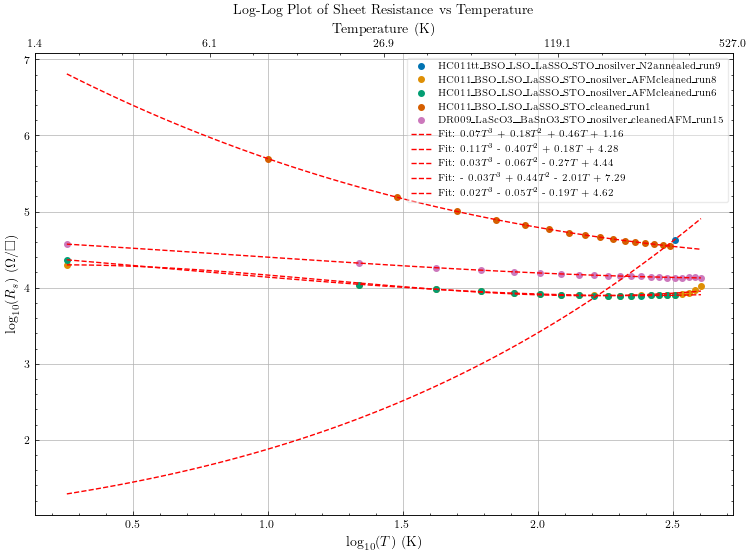

In [44]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Plot log10(rho_film) vs log10(Temp)
    Bi_zero = int(d.ctf[5]/2)-1
    ax.scatter(np.log10(d.res_data[:, Bi_zero, 0]), np.log10(d.res_data[:, Bi_zero, 4]), marker='o', linestyle='-', label=f'{d.plot_str}')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel(r'$\log_{10}(T)$ (K)')
ax.set_title(r'Arrhenius Plot at H = 0 kOe')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\log_{10}(R_s)$ ($\Omega/ \square$)')
    ax.set_title(r'Log-Log Plot of Sheet Resistance vs Temperature')
else:
    ax.set_ylabel(r'$\log_{10}(\rho)$ ($\Omega \cdot m$)')
    ax.set_title(r'Log-Log Plot of Resistivity vs Temperature')


# Fit to polynomial
x_vals = np.linspace(np.log10(min_temp), np.log10(max_temp), 100)
for j, d in enumerate(dat):
    Bi_zero = int(d.ctf[5]/2)-1
    
    # Filter out zero values
    eps = 1e-12
    mask = (d.res_data[:, Bi_zero, 0] > 0)
    temp_vals = d.res_data[mask, Bi_zero, 0] + eps
    res_vals = d.res_data[mask, Bi_zero, 4] + eps

    log_T = np.log10(temp_vals)
    log_R = np.log10(res_vals)
    # Change polynomial order as needed (1 for linear, 2 for quadratic, 3 for cubic, etc.)
    poly_order = 3
    coeffs = np.polyfit(log_T, log_R, poly_order)
    
    # Convert to readable equation string
    equation = poly_to_string(coeffs)
    print(str(equation))
    
    # Plot with equation in label
    ax.plot(x_vals, np.polyval(coeffs, x_vals), 
            label=f'Fit: {str(equation)}', 
            linestyle='--', color='r')
# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

#ax.set_xlim(1.2, 2.5)

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
log_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([f'{10**tick:.1f}' for tick in log_ticks])
ax2.set_xlabel('Temperature (K)')

# Disable grid lines for the secondary x-axis
ax2.grid(False)

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_LogR_vs_LogT' # name for exported figure
plot_title = 'Log(R) vs Log(T)' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Plot IV Data to check linearity of Hall measurements

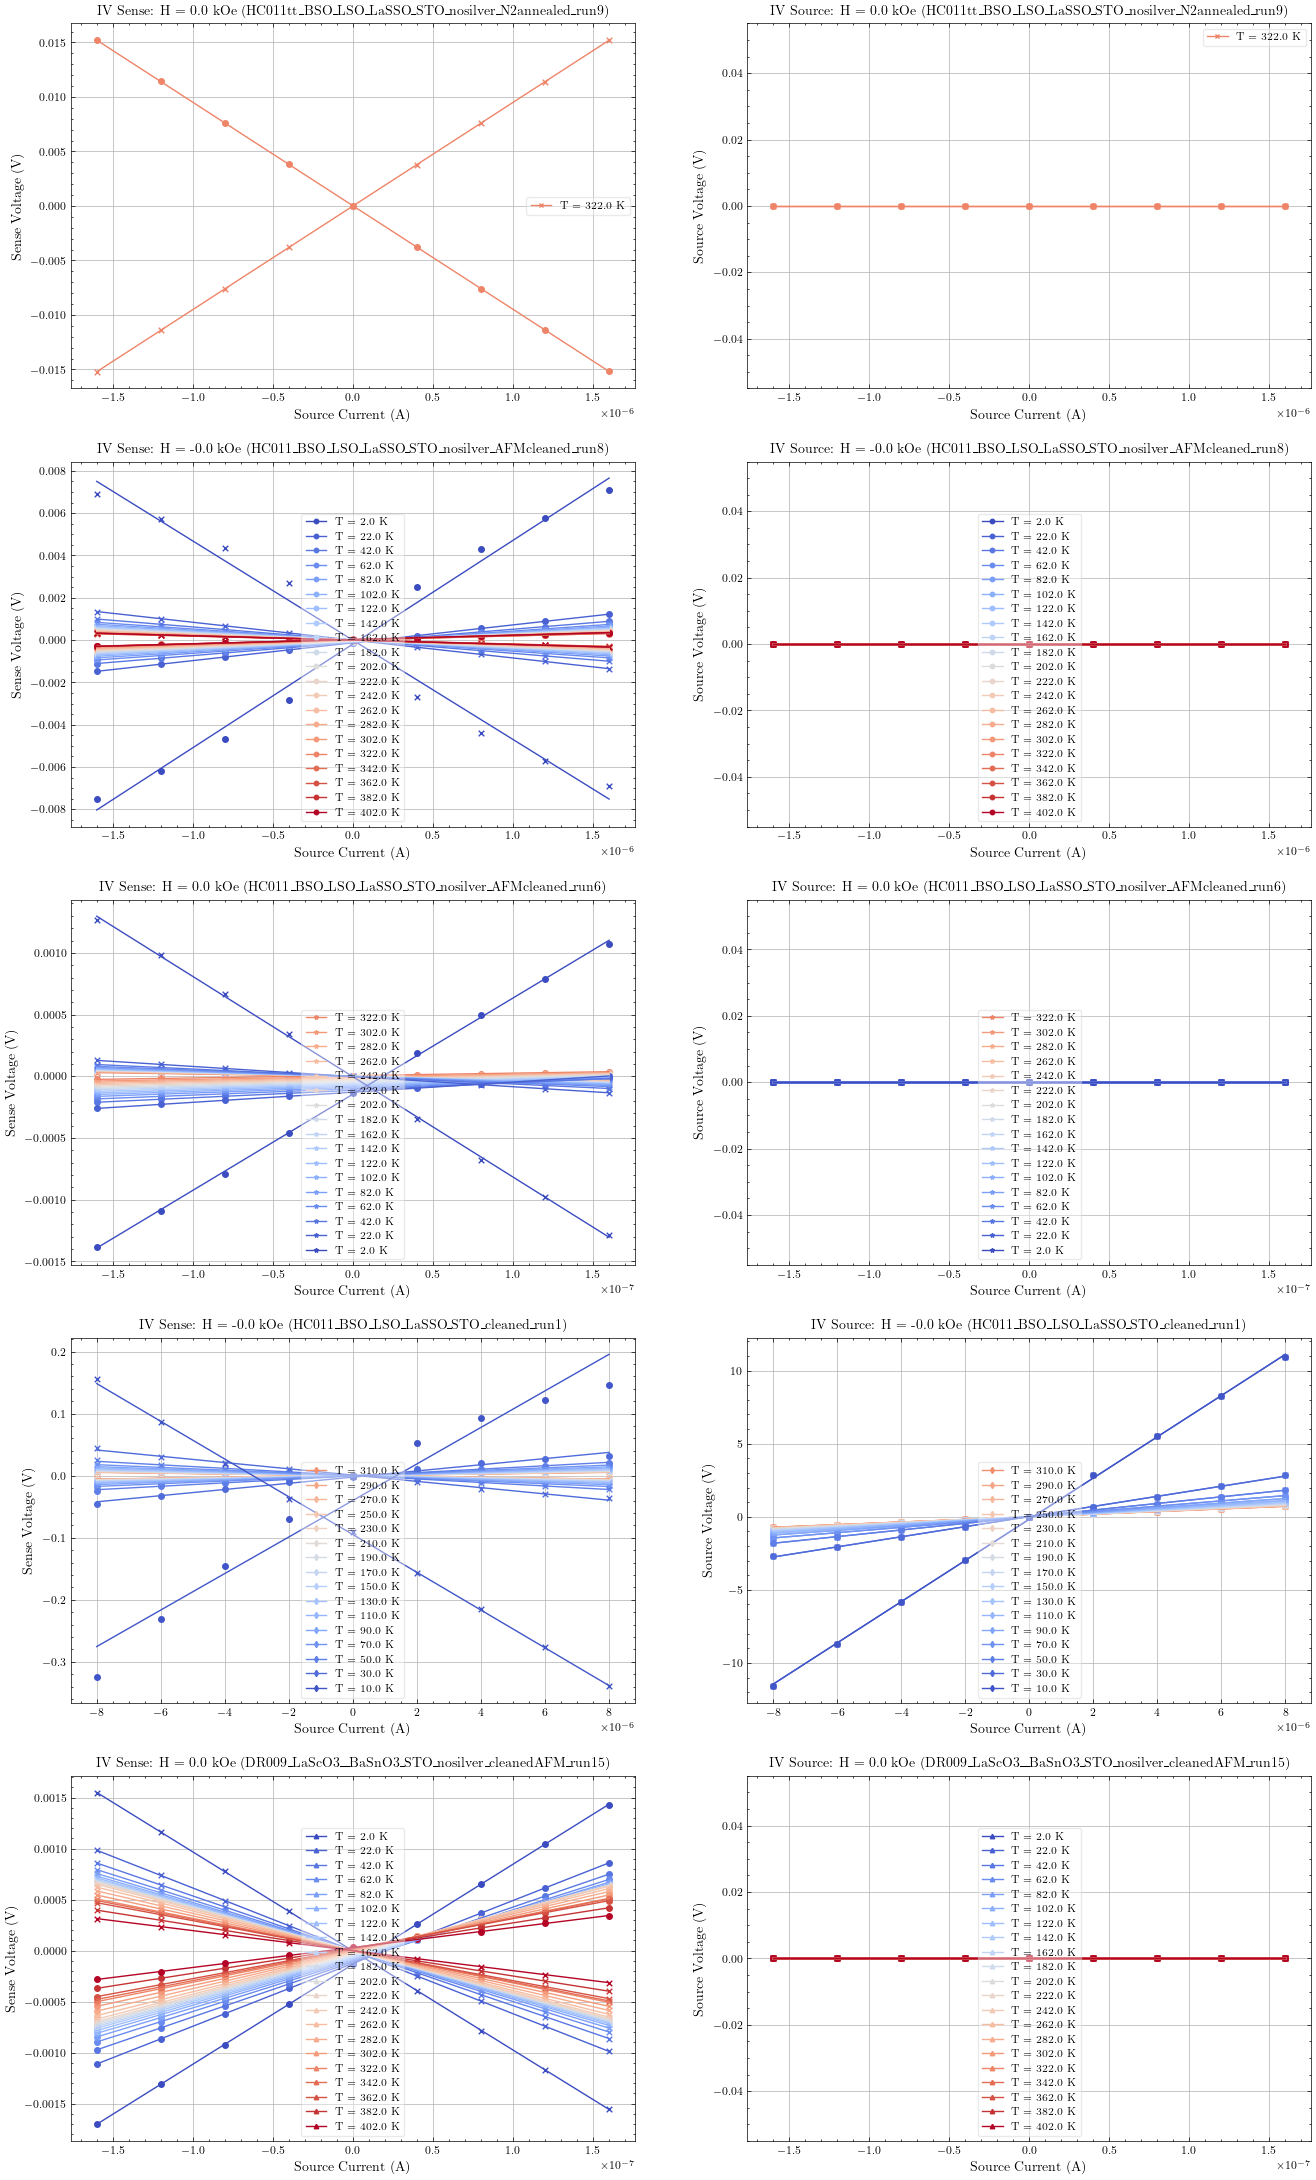

In [45]:
fig = plt.figure(figsize=(16, 5.5*len(dat)))
gs = fig.add_gridspec(len(dat), 2)
labels = ['index_1', 'index_2']
color_s = ['r', 'g', 'b', 'm'] # simple four colors for the 4 configurations of vdp

for j, d in enumerate(dat):
    
    ax = fig.add_subplot(gs[j, 0])
    ax1 = fig.add_subplot(gs[j, 1])
    
    # Select the range for either 'VDP' or 'HallBar' data
    dat_range = [0,1] if d.measurement_type == 'VDP' else [2,3]

    # Select the B field that you want to plot
    Bi = int( (d.ctf[5]/2)-1 )
    
    # Loop over the temperatures
    for Ti in range(d.ctf[4]):
        # Loop over the two hall index configurations
        for i in dat_range:  
            
            ## Plotting Source(I) vs Sense(V) data
            R_test = linregress(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 4, i])
            ax.scatter(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 4, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])), marker=mark_p[i])
            ax.plot(d.data_np_nd[Ti, Bi, :, 2, i], R_test.intercept + R_test.slope * d.data_np_nd[Ti, Bi, :, 2, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])))

            ## plotting the Source(I) vs Source(V) data
            R_test_2 = linregress(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 3, i])
            ax1.scatter(d.data_np_nd[Ti, Bi, :, 2, i], d.data_np_nd[Ti, Bi, :, 3, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])), marker=mark_p[i])
            ax1.plot(d.data_np_nd[Ti, Bi, :, 2, i], R_test_2.intercept + R_test_2.slope * d.data_np_nd[Ti, Bi, :, 2, i], color=cmap_temp(norm_temp(d.ctf[1][Ti])))
    
        # Add a dummy plot for the legend entry
        ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(d.ctf[1][Ti])), label=f'T = {d.ctf[1][Ti]} K')
        ax1.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(d.ctf[1][Ti])), label=f'T = {d.ctf[1][Ti]} K')
        
    ax.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)
    ax1.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)
        
        
    # Set labels and title
    ax.set_xlabel('Source Current (A)')
    ax.set_ylabel('Sense Voltage (V)')
    ax.set_title(f'IV Sense: H = {np.round(d.data_np_nd[0, Bi, 0, 1, 0],decimals=0)*10} kOe ({d.plot_str})')
    
    ax1.set_xlabel('Source Current (A)')
    ax1.set_ylabel('Source Voltage (V)')
    ax1.set_title(f'IV Source: H = {np.round(d.data_np_nd[0, Bi, 0, 1, 0],decimals=0)*10} kOe ({d.plot_str})')

   
#ax.set_ylim(-0.01,0.01)

plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_IV_Hall' # name for exported figure
plot_title = 'Plot IV data of Hall Measurement to Check Linearity' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## R-squared Analysis to Check Linearity of Hall I-V data

average R-squared_A for HC011tt_BSO_LSO_LaSSO_STO_nosilver_N2annealed_run9 = 0.9999996246445071
average R-squared_B for HC011tt_BSO_LSO_LaSSO_STO_nosilver_N2annealed_run9 = 0.99999961729024


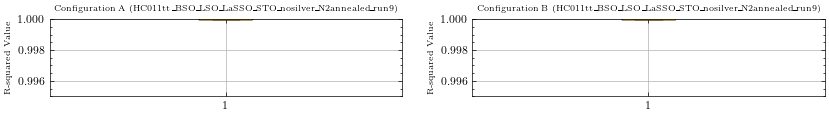

average R-squared_A for HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run8 = 0.9983002141486664
average R-squared_B for HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run8 = 0.9996697810898513
average R-squared_A for HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run6 = 0.9999187527959954
average R-squared_B for HC011_BSO_LSO_LaSSO_STO_nosilver_AFMcleaned_run6 = 0.9999244917815302
average R-squared_A for HC011_BSO_LSO_LaSSO_STO_cleaned_run1 = 0.999358604770997
average R-squared_B for HC011_BSO_LSO_LaSSO_STO_cleaned_run1 = 0.9984197617662767
average R-squared_A for DR009_LaScO3__BaSnO3_STO_nosilver_cleanedAFM_run15 = 0.9999992960160957
average R-squared_B for DR009_LaScO3__BaSnO3_STO_nosilver_cleanedAFM_run15 = 0.9999989512547808


In [46]:
fig = plt.figure(figsize=(10, 3*len(dat) // 2))
gs = fig.add_gridspec(1+len(dat), 2)

for j, d in enumerate(dat):
    hall_data_flat = np.copy(d.hall_data).reshape((d.ctf[4]*d.ctf[5], 7))
    
    print(f'average R-squared_A for {d.filename} =', np.mean(np.abs(hall_data_flat[:, 3])))
    print(f'average R-squared_B for {d.filename} =', np.mean(np.abs(hall_data_flat[:, 5])))
    ax = fig.add_subplot(gs[j, 0])
    
    # Plot R-square values in a boxplot
    # Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
    ax.boxplot(np.abs(hall_data_flat[:, 3]))
    ax.set_title(f'Configuration A ({d.plot_str})', fontsize=6)
    ax.set_ylabel('R-squared Value', fontsize=6)
    ax.set_ylim(1-5e-3, 1)  # If needed, you can set x-axis limits too

    ax2 = fig.add_subplot(gs[j, 1])
    ax2.boxplot(np.abs(hall_data_flat[:, 5]))
    ax2.set_title(f'Configuration B ({d.plot_str})', fontsize=6)
    ax2.set_ylabel('R-squared Value', fontsize=6)
    ax2.set_ylim(1-5e-3, 1)  # If needed, you can set x-axis limits too
    plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_R_squared_hall_res' # name for exported figure
plot_title = 'R-squared Analysis to Check Linearity of Resistivity I-V data' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Hall Resistivity ($\rho_{xy}$)
- This is: $\rho_{xy} = \frac{V_{measured-perpendicular}}{I_{source}}*t$
- Define: $Rsheet_{xy} = \frac{V_{measured-perpendicular}}{I_{source}}$ = $\frac{\rho_{xy}}{t}$


## Hall resisitivity vs Temperature

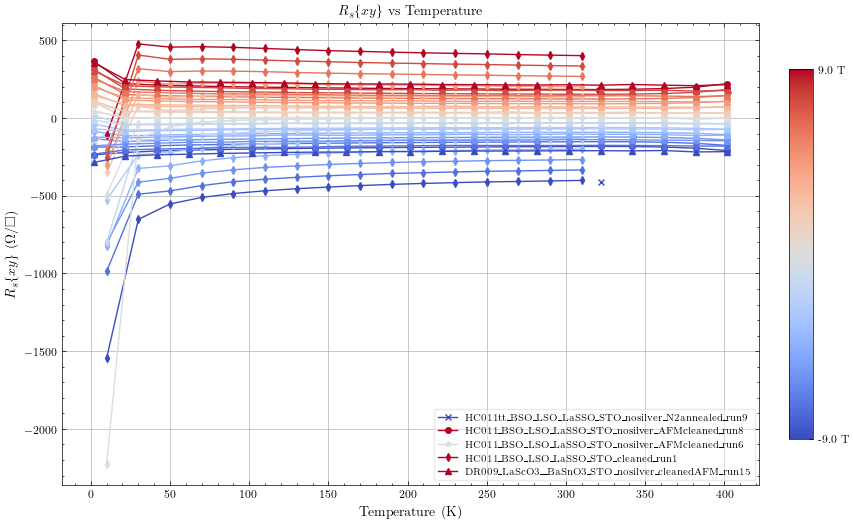

In [47]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig, gs[1], sm, min_field, max_field, fig_size)

# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the B fields
    for Bi in range(d.ctf[5]):
        # Plot rho_film vs Temp
        ax.plot(d.hall_data[:, Bi, 0], d.hall_data[:, Bi, 6] * unit_scale, marker=mark_p[j], color= cmap_field(norm_field(d.hall_data[0, Bi, 1])))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(d.hall_data[0, Bi, 1])), label=f'{d.plot_str}')
        
        
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    ax.set_title(r'$R_{s}\{xy\}$ vs Temperature')

elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title(r'$\rho_{xy}$ vs Temperature')

else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_title(r'$\rho_{xy}$ vs Temperature')
# Set labels and title


# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a legend
ax.legend()

# Show the plot
#ax.set_ylim(-500,500)
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xy_vs_T' # name for exported figure
plot_title = 'Hall resisitivity vs Temperature' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Hall Resistivity vs Field

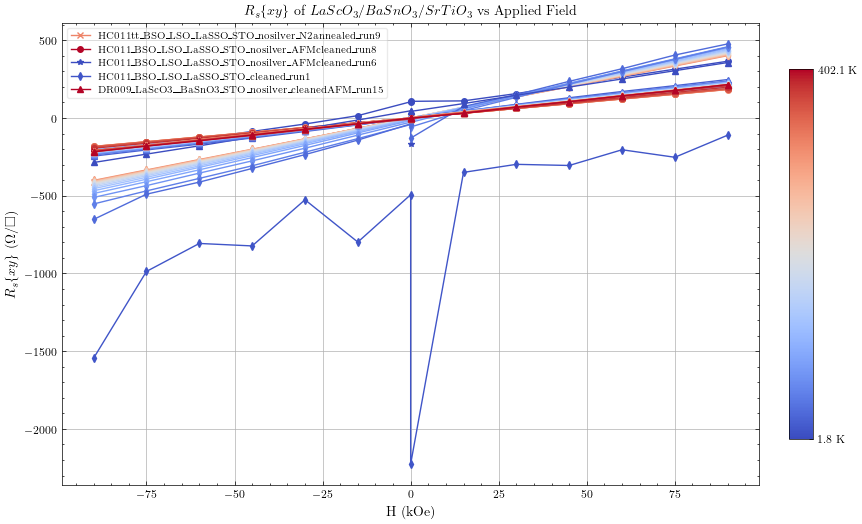

In [48]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field = False)


# Loop over the data sets
for j, d in enumerate(dat):

    for Ti, T in enumerate(d.ctf[1], start=0):
        if T>0:

            # Plot rho_film vs Temp
            ax.plot(d.hall_data[Ti, :, 1]*10, d.hall_data[Ti, :, 6]*unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)))
        
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_temp(norm_temp(T)), label=f'{d.plot_str}')


# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('H (kOe)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    ax.set_title(r'$R_{s}\{xy\}$' f' of {d.material} vs Applied Field')
    
elif ohm_m == 1:
    ax.set_ylabel(r'$\rho_{xy}\, ($\Omega \cdot$m)')
    ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')
    


# Add a legend
ax.legend()

#ax.set_ylim(-3000,3000)
# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xy_vs_field' # name for exported figure
plot_title = 'Hall resisitivity vs Applied Field' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Hall Resistivity vs Field Configuration A vs B
- Dotted line vs solid line is B vs A

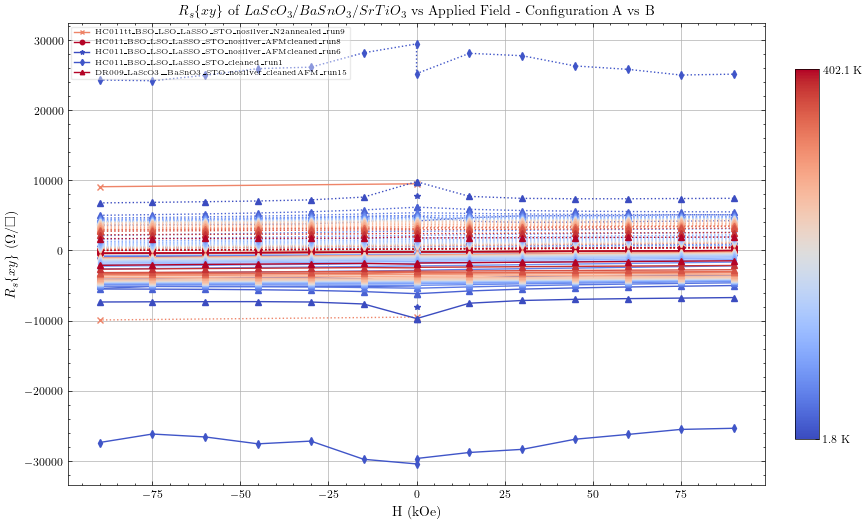

In [49]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field = False)

# Create a secondary y-axis
#ax2 = ax.twinx()

# Loop over the data sets
for j, d in enumerate(dat, start=0):
    # Loop over the temperatures
    for Ti, T in enumerate(d.ctf[1], start=0):
        # Plot rho_film vs Temp
        ax.plot(d.hall_data[Ti, :, 1]*10, (d.hall_data[Ti, :, 2])*unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)))
        ax.plot(d.hall_data[Ti, :, 1]*10, (d.hall_data[Ti, :, 4])*unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)), linestyle=':')
        
        #ax2.plot(d.ctf[2][:] * 10, d.mag_res[t_count, :, 2], color=cmap_temp(norm_temp(t)), linestyle=':')
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_temp(norm_temp(T)), label=f'{d.plot_str}')


# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('H (kOe)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    ax.set_title(r'$R_{s}\{xy\}$' f' of {d.material} vs Applied Field - Configuration A vs B')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field - Configuration A vs B')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field - Configuration A vs B')
    

# Add a legend
ax.legend(loc='best', framealpha=0.4, markerscale=0.8, fontsize='xx-small')

#ax.set_ylim(-200, 200)

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xy_vs_field_AvsB' # name for exported figure
plot_title = 'Hall resisitivity vs Applied Field Comparing Configurations' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Hall Resistivity ($\rho_{xy}$)
- This is: $\rho_{xy} = \frac{V_{measured-perpendicular}}{I_{source}}*t = \frac{B}{n\times e}$
- Or $Rsheet_{xy} = \frac{V_{measured-perpendicular}}{I_{source}}$ = $\frac{\rho_{xy}}{t}$

#### Step 1
- $V_H = \frac{I\times B}{n\times e\times t}$
- $V_H = (\frac{\rho_{xy}}{t})\times I = M_1\times I$ 
- $M_1$ (first gradient) = $\frac{\rho_{xy}}{t}$

#### Step 2
- $\rho_{xy} = \frac{1}{n\times e}\times B = M_2*B$
- $M_2 = R_H = \frac{1}{n\times e}$ = gradient of $\rho_{xy}$ vs B
- $n = \frac{1}{M_2 \times e} = \frac{1}{R_H \times e}$
- $\mu = \frac{1}{n\times e \times \rho_{xy}} = \frac{M_2}{\rho_{xy}} = \frac{R_H}{ \rho_{xy}}$

## 2DEG Case
- no longer inputting a t as it is unphysical
- $R_{sheet} = \frac{\rho_{xy}}{t}$
- $n_{2D} = n\times t$

#### Step 1
- $V_H = \frac{I\times B}{n\times e\times t}$
- $V_H = (\frac{\rho_{xy}}{t})\times I = M_1\times I$ 
- $M_1$ (first gradient) = $\frac{\rho_{xy}}{t}$

#### Step 2
- $\rho_{xy} = \frac{1}{n\times e}\times B$ ---> $M_1 = \frac{\rho_{xy}}{t} = \frac{1}{n\times e \times t}\times B = M_2*B$
- $M_2 = \frac{R_H}{t} = \frac{1}{n\times e \times t}$ 
- $n_{2D} = n\times t = \frac{1}{M_2 \times e} = \frac{1}{R_H \times e}$
- $\mu = \frac{1}{n\times e \times \rho_{xy}} = \frac{1}{\frac{n_{2d}}{t}\times e \times (\R_{sheet}\times t)} = \frac{1}{n_{2d}\times e \times \R_{sheet}} = \frac{M_2}{\R_{sheet}} = \frac{R_H}{ \rho_{xy}}$

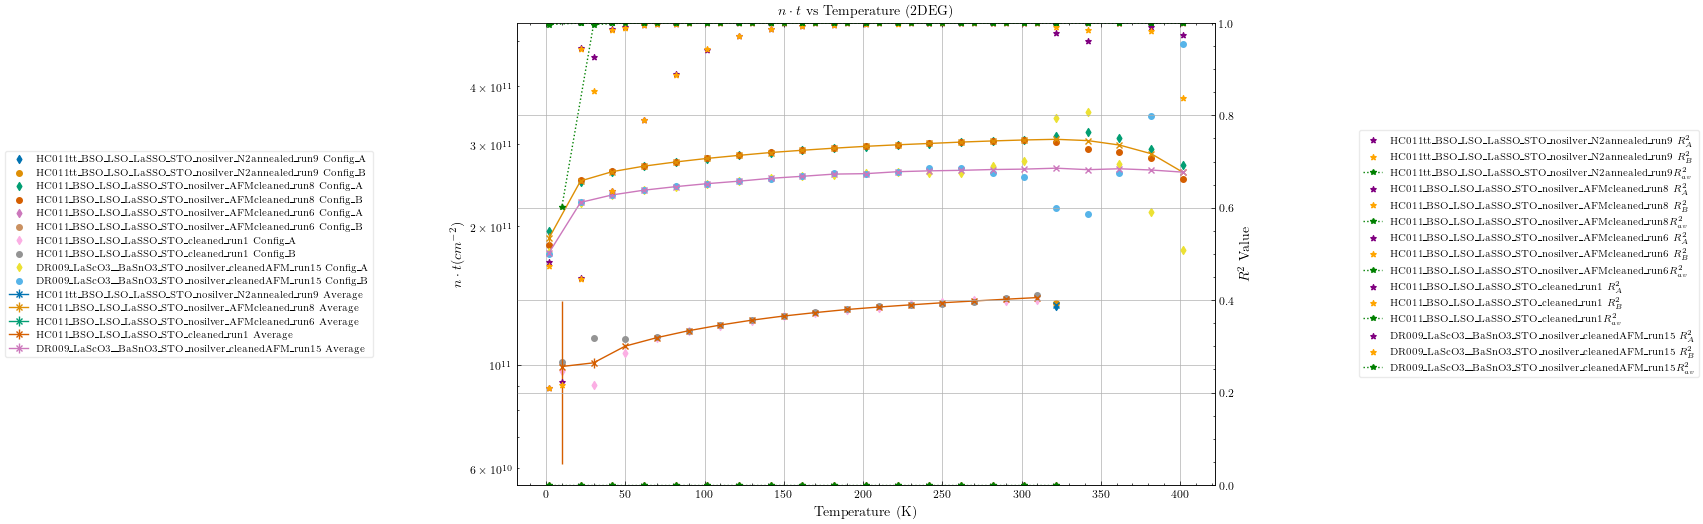

In [50]:
# Create a figure and axis
fig = plt.figure()
# Create a single subplot
ax = fig.add_subplot(111)  
# Create a second y-axis on the right
ax2 = ax.twinx()

# Create separate marker arrays for positive and negative fields stitched together
marker_hall = ['x', 'o', '*']

for j, d in enumerate(dat):
    
    # Plot the charge carrier density on the right y-axis
    ax.scatter(d.hall_coefficient[:, 0], 1e-6 * np.divide(1, np.multiply(d.hall_coefficient[:, 1], scipy.constants.e)), marker='d', label=f'{d.plot_str} Config_A')
    ax.scatter(d.hall_coefficient[:, 0], 1e-6 * np.divide(1, np.multiply(d.hall_coefficient[:, 3], scipy.constants.e)), marker='o', label=f'{d.plot_str} Config_B')
    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 7],yerr = d.hall_coefficient[:, 8], fmt='-x', label=f'{d.plot_str} Average')
    # 1e-6 to convert from m^-3 to cm^-3
    
    # Plot the R^2 values on the left y-axis
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 2]), color='purple', marker='*', label=f'{d.plot_str} $R^2_A$')
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 4]), color='orange', marker='*', label=f'{d.plot_str} $R^2_B$')
    ax2.plot(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 6]), color='green', marker='*', linestyle = ':', label=f'{d.plot_str}' r'$R^2_{av}$')
    

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$n\cdot t$' r'($cm^{-2}$)')
    ax.set_title(r'$n\cdot t$ vs Temperature (2DEG)')
else:
    ax.set_ylabel(r'n($cm^{-3}$)')
    ax.set_title(r'Charge Carrier Density vs Temperature')  

ax2.set_ylabel('$R^2$ Value')


# Add legends
ax.legend(loc='center right', bbox_to_anchor=(-0.2, 0.5), framealpha=0.4)
ax2.legend( loc='center left', bbox_to_anchor=(1.2, 0.5), framealpha=0.4)

# Set the R^2 limits between 0 and 1
ax2.set_ylim(0, 1)

#ax.set_ylim(0,5e28)
ax.set_yscale('log')

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_n_vs_temperature' # name for exported figure
plot_title = 'Charge Carrier Density Vs T' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Mobility vs T

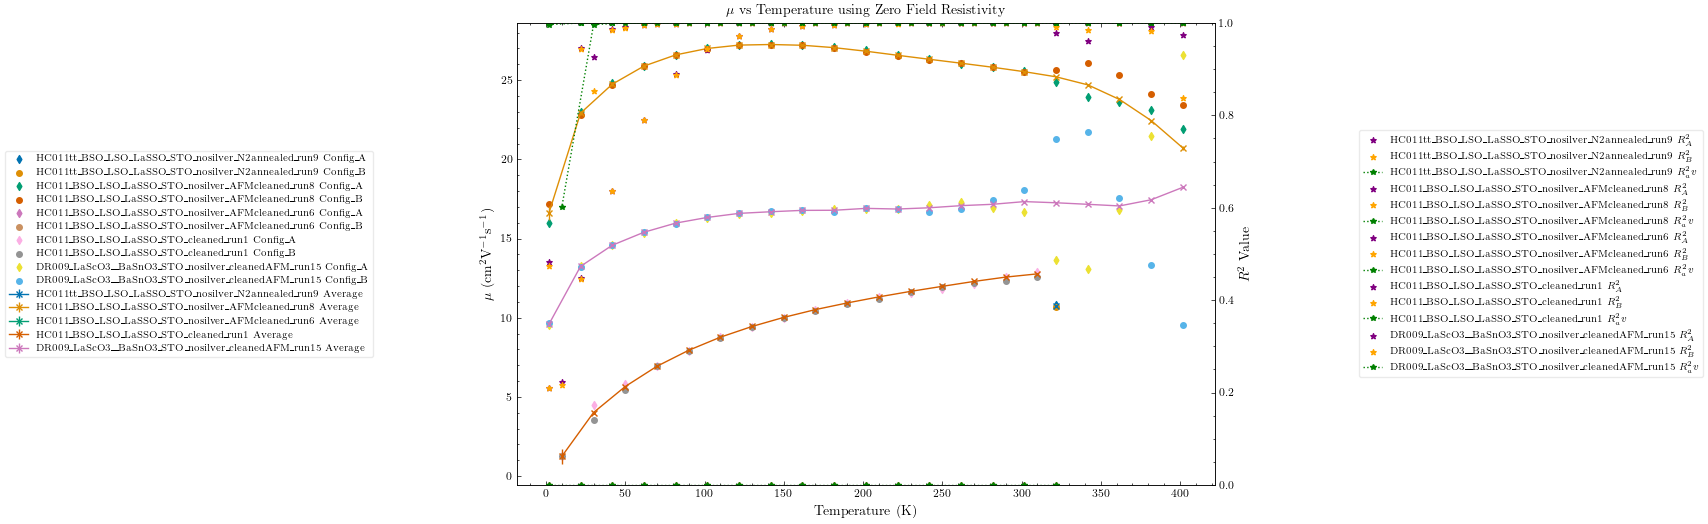

In [51]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot
# Create a second y-axis on the right
ax2 = ax.twinx()

# Loop over the data sets
for j, d in enumerate(dat, start=0):
    # Calculate index of the zero field data
    Bi_zero = int(d.ctf[5]/2)-1 

    # Plot the mobility on the left y-axis
    ax.scatter(d.hall_coefficient[:, 0], 1e4 * np.divide(d.hall_coefficient[:, 1], d.res_data[:, Bi_zero, 4]), marker='d',  label=f'{d.plot_str} Config_A')
    ax.scatter(d.hall_coefficient[:, 0], 1e4 * np.divide(d.hall_coefficient[:, 3], d.res_data[:, Bi_zero, 4]), marker='o', label=f'{d.plot_str} Config_B')
    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 9],yerr = d.hall_coefficient[:, 10], fmt='-x', label=f'{d.plot_str} Average')

    # Plot R^2 values on the right y-axis
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 2]), color='purple', marker='*', label=f'{d.plot_str} $R^2_A$')
    ax2.scatter(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 4]), color='orange', marker='*', label=f'{d.plot_str} $R^2_B$')
    ax2.plot(d.hall_coefficient[:, 0], np.abs(d.hall_coefficient[:, 6]), color='green', marker='*', linestyle = ':', label=f'{d.plot_str} $R^2_av$')
    
# Set labels and title for the axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')
ax.set_title(r'$\mu$' f' vs Temperature using Zero Field Resistivity')
ax2.set_ylabel('$R^2$ Value')

ax.grid(False)
ax2.grid(False)

# Set the R^2 limits between 0 and 1
ax2.set_ylim(0, 1)

# Add legends
ax.legend(loc='center right', bbox_to_anchor=(-0.2, 0.5), framealpha=0.4)
ax2.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), framealpha=0.4)

#ax.set_xlim(0,20)
#ax.set_yscale('log')

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_mobility_vs_temperature' # name for exported figure
plot_title = 'Mobility vs T' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Charge Carrier Density Only

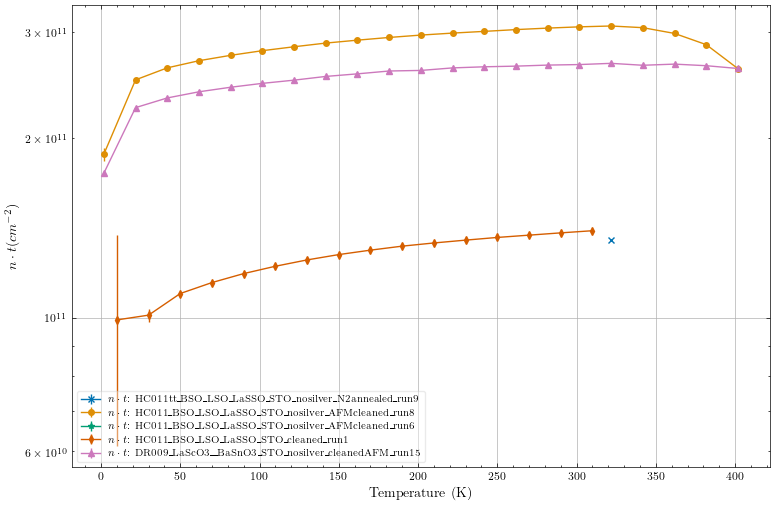

In [52]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$n\cdot t$' r'($cm^{-2}$)')
    
    # set a label to pass as a prefix to the plot string
    n_label = r'$n\cdot t$: '
    #ax.set_title(r'$n\cdot t$ vs Temperature (2DEG)')
else:
    ax.set_ylabel(r'n($cm^{-3}$)')
    # set a label to pass as a prefix to the plot string
    n_label = r'$n$: '
    #ax.set_title(r'Charge Carrier Density vs Temperature') 
    
    
for j, d in enumerate(dat):
    
    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 7],yerr = d.hall_coefficient[:, 8], fmt='-'+mark_p[j], label=f'{n_label}{d.plot_str}')

# Add a legend for the y-axis
ax.legend()

ax.set_yscale('log')
#ax.set_xlim(0, 304)

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_n_only_vs_temperature' # name for exported figure
plot_title = 'Charge Carrier Density Vs T' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## Mobility Only

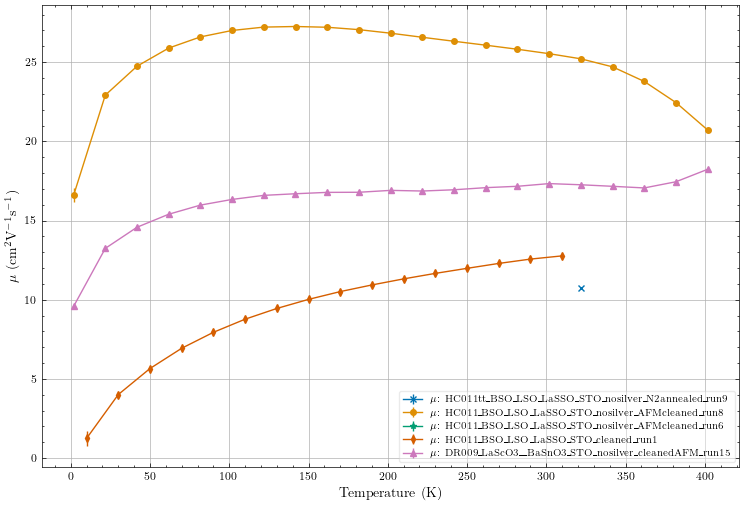

In [53]:
# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # Create a single subplot

# Plot data on the right y-axis
for j, d in enumerate(dat, start=0):
    
    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 9],yerr = d.hall_coefficient[:, 10], fmt='-'+mark_p[j],  label=r'$\mu$'f': {d.plot_str}')

# Set labels for the right y-axis
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')

        
# Add a legend for the left y-axis
ax.legend()

#ax.set_ylim(0,20)

# Show the plot
plt.show()
 
# Export Metadata 
plot_filename = f'{dat[0].plot_str}_u_only_vs_temperature' # name for exported figure
plot_title = 'Mobility vs T' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

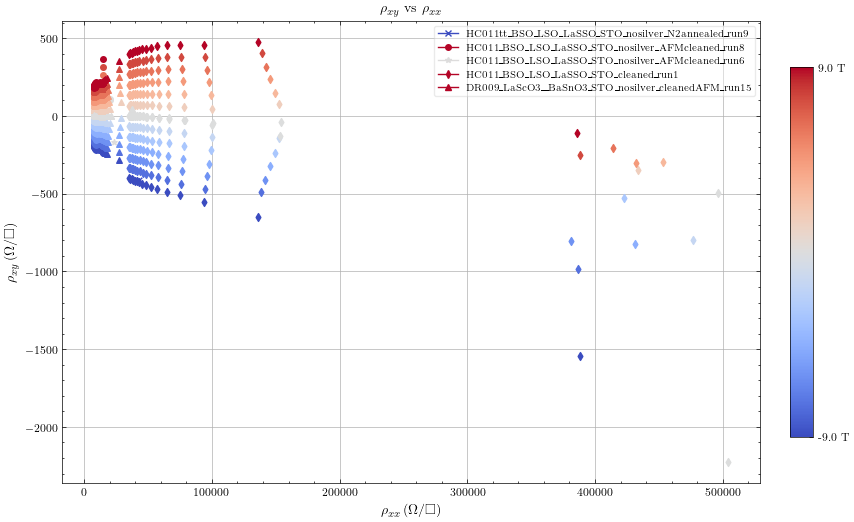

In [54]:
# Create a figure and GridSpec layout
fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig, gs[1], sm, min_field, max_field, fig_size)

# Loop over the data sets
for j, d in enumerate(dat, start=0):
    for Bi, B in enumerate(d.ctf[2], start=0):
        # Plot rho_film vs Temp
        ax.scatter(d.res_data[:, Bi, 4] * unit_scale, d.hall_data[:, Bi, 6] * unit_scale, marker=mark_p[j], color=cmap_field(norm_field(B)))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(B)), label=f'{d.plot_str}')

ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\rho_{xy}\,(\Omega/\square)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\Omega/\square)$')

elif ohm_m == 1:
    ax.set_ylabel(r'$\rho_{xy}\,(\Omega \cdot m)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\Omega \cdot m)$')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Export Metadata 
plot_filename = f'{dat[0].plot_str}_rho_xx_vs_rho_xy' # name for exported figure
plot_title = 'ρ_xy vs ρ_xx' # title for powerpoint
notes = sample_tag_gen(dat) + [''] # notes for the powerpoint in text box starting with sample tag

# Append the figure, title and notes to the list for exporting later
fig_list.append((fig, plot_filename, plot_title, notes)) 

##  Shubnikov–de Haas (SdH) oscillations

In [55]:
# # Create a figure and GridSpec layout
# fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
# gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# # Create the main plot
# ax = fig.add_subplot(gs[0])
# ax2 = ax.twinx()

# # Add and adjust the colorbar using a custom function
# sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
# add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field=False)

# cax = fig.axes[-1]
# pos = cax.get_position()
# cax.set_position([
#     pos.x0 + 0.15, 
#     pos.y0,  
#     pos.width,  
#     pos.height  
# ])



# # Loop over the data sets
# for j, d in enumerate(dat):
#     # Loop over the temperatures
#     for Ti, T in enumerate(d.ctf[1], start=0):  
#         if T > 1:
#             ### Fitting to MR data
#             # Perform a quadratic fit on the Magnetoresistance data
#             #tf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]
#             x_data_MR = d.tf_av[Ti,:,1] * 10
#             # Get modulus of x_data_MR
#             x_data_MR = np.abs(x_data_MR)
#             y_data_MR = d.mag_res[Ti, :, 2]
#             coeffs_MR = np.polyfit(x_data_MR, y_data_MR, 1)
#             polynomial_fit_MR = np.polyval(coeffs_MR, x_data_MR)

#             # Plot the original MR data and the quadratic fit
#             #ax.scatter(x_data_MR, y_data_MR, marker=mark_p[j], color='green')  # initial MR data
#             #ax.plot(x_data_MR, polynomial_fit_MR, color='blue')  # quadratic fit to MR data
#             ax.plot(x_data_MR, y_data_MR - polynomial_fit_MR, marker=mark_p[j], color='purple')  # Residual MR


#             ### Fitting to Hall data
#             index = Ti * d.ctf[5]
            
            
#             # Extract the positive and negative applied B of the Hall data
#             x_data_Hall_neg = d.hall_data[Ti, 0:int(d.ctf[5]/2), 1] * 10
#             y_data_Hall_neg = d.hall_data[Ti, 0:int(d.ctf[5]/2), 6] * unit_scale
#             x_data_Hall_pos = d.hall_data[Ti, int(d.ctf[5]/2):, 1] * 10
#             y_data_Hall_pos = d.hall_data[Ti, int(d.ctf[5]/2):, 6] * unit_scale

#             # Perform a linear fit on the negative Hall data
#             coeffs_Hall_neg = np.polyfit(x_data_Hall_neg, y_data_Hall_neg, 1)
#             polynomial_fit_Hall_neg = np.polyval(coeffs_Hall_neg, x_data_Hall_neg)
#             # Perform a linear fit on the positive Hall data
#             coeffs_hall_pos = np.polyfit(x_data_Hall_pos, y_data_Hall_pos, 1)
#             polynomial_fit_Hall_pos = np.polyval(coeffs_hall_pos, x_data_Hall_pos)
            
#             y_data_Hall_neg_res = y_data_Hall_neg - polynomial_fit_Hall_neg
#             #y_data_Hall_neg_res = scipy.signal.medfilt(y_data_Hall_neg_res, kernel_size=5)
#             y_data_Hall_pos_res = y_data_Hall_pos - polynomial_fit_Hall_pos
#             #y_data_Hall_pos_res = scipy.signal.medfilt(y_data_Hall_pos_res, kernel_size=5)
            
#             # Plot the original Hall data and the polynomial fit
#             # ax2.scatter(x_data_Hall_neg, y_data_Hall_neg, marker=mark_p[j], color='black')  # initial Hall data
#             # ax2.plot(x_data_Hall_neg, polynomial_fit_Hall_neg, color='black')  # polynomial fit to Hall data
#             # ax2.scatter(x_data_Hall_pos, y_data_Hall_pos, marker=mark_p[j], color='black')  # initial Hall data
#             # ax2.plot(x_data_Hall_pos, polynomial_fit_Hall_pos, color='black')  # polynomial fit to Hall data
            
#             ax2.plot(-x_data_Hall_neg, y_data_Hall_neg_res, marker=mark_p[j], color='red') # Residual Hall for negative field
#             ax2.plot(x_data_Hall_pos, y_data_Hall_pos_res, marker=mark_p[j], color='orange') # Residual Hall for positive field
#             #ax2.plot(x_data_Hall_pos, (y_data_Hall_neg_res + y_data_Hall_pos_res)/2, marker=mark_p[j], color='black') # Average Residual Hall 
        
    
#     # Add a dummy plot for the legend entry
#     ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp(T)), label=f'{d.plot_str}')

        
# ax.set_xlabel('H (kOe)')
# ax.set_ylabel(r'Magnetoresistance (\%)')
# ax.set_title(f'Magnetoresistance and Hall Resistace - offsets removed - vs Field')
# ax.legend()

# ax2.set_ylabel(r'Hall Resistance ($\Omega/\square$)')

# #ax.set_xlim(60,90)
# #ax.set_ylim(-10,10)
# plt.show()

# # Export Metadata 
# plot_filename = f'{dat[0].plot_str}_SDH_oscillations' # name for exported figure
# plot_title = 'Shubnikov–de Haas Oscillations' # title for powerpoint
# notes = sample_tag_gen(dat) + ['test'] # notes for the powerpoint in text box starting with sample tag

# # Append the figure, title and notes to the list for exporting later
# fig_list.append((fig, plot_filename, plot_title, notes)) 

## SDH $\frac{-d^2R_{xx}}{dB^2}$

In [56]:
# # Create a figure and GridSpec layout
# fig = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
# gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# # Create the main plot
# ax = fig.add_subplot(gs[0])
# ax2 = ax.twinx()

# # Add and adjust the colorbar using a custom function
# sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
# add_colorbar(fig, gs[1], sm, min_temp, max_temp, fig_size, field=False)

# cax = fig.axes[-1]
# pos = cax.get_position()
# cax.set_position([
#     pos.x0 + 0.15, 
#     pos.y0,  
#     pos.width,  
#     pos.height  
# ])



# # Loop over the data sets
# for j, d in enumerate(dat):
#     # Loop over the temperatures
#     for Ti, T in enumerate(d.ctf[1], start=0):  
#         if T > 1:
            
#             ### Compute the second derivative of the longitudinal sheet resistance with respect to the magnetic field
#             B_field = d.hall_data[Ti,:, 1] * 10 # Magnetic field
            
#             Rsxx = d.res_data[Ti, :, 4] # Sheet resistance
            
#             # Get the indices that would sort B_field in ascending order
#             sorted_indices = np.argsort(B_field)

#             # Sort B_field and Rsxx using the sorted indices
#             B_field_sorted = B_field#[sorted_indices]
#             Rsxx_sorted = Rsxx#[sorted_indices]

#             # Compute the first and second derivatives
#             dRsxx_dB = np.gradient(Rsxx_sorted, B_field_sorted)
#             d2Rsxx_dB2 = np.gradient(dRsxx_dB, B_field_sorted)
            

#             ax.plot(1/B_field_sorted, -d2Rsxx_dB2, marker=mark_p[j], color='green')
            
#             ### Compute the second derivative of the hall resistance with respect to the magnetic field
#             Rsxy = d.hall_data[Ti, :, 6] # Hall resistivity
#             Rsxy_sorted = Rsxy[sorted_indices]
            
#             # Compute the first and second derivatives
#             dRsxy_dB = np.gradient(Rsxy_sorted, B_field_sorted)
#             d2Rsxy_dB2 = np.gradient(dRsxy_dB, B_field_sorted)
            
#             ax2.plot(1/B_field_sorted, -d2Rsxy_dB2, marker=mark_p[j], color='blue')


    
#     # Add a dummy plot for the legend entry
#     ax.plot([], [], marker = mark_p[j], color = cmap_temp(norm_temp(T)), label=f'{d.plot_str}')

        
# ax.set_xlabel(r'Inverse Magnetic Field ($1/B$)')
# ax.set_ylabel(r'$-d^2R_{xx}/dB^2 \, (\Omega/ \square T^2)$')
# ax.set_title(r'Second Derivative of Longitudinal Sheet Resistance')
# ax.legend()


# ax.set_xlim(0, 0.1)
# ax.set_ylim(-0.005, 0.005)
# ax2.set_ylim(-0.005, 0.005)

# #plt.tight_layout()
# plt.show()


# # Export Metadata 
# plot_filename = f'{dat[0].plot_str}_Second_Derivative_of_MR' # name for exported figure
# plot_title = 'Second_Derivative_of_MR' # title for powerpoint
# notes = sample_tag_gen(dat) + ['test'] # notes for the powerpoint in text box starting with sample tag

# # Append the figure, title and notes to the list for exporting later
# fig_list.append((fig, plot_filename, plot_title, notes)) 

## Exporting

#### Exporting All Figures as Individual Files

In [57]:
if export_data:
    for fig_obj, fig_filename, fig_title, notes in fig_list:
        save_path = Path(dat[0].directory) / Path(f"{dat[0].sample_code}_{powerpoint_string}_{fig_filename}.{fig_format}")
        fig_obj.savefig(save_path, dpi=600, bbox_inches='tight', transparent=plot_transparency)

#### Exporting to Powerpoint

In [58]:
if export_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()
    # Set slide dimensions to 16:9 widescreen (13.333 x 7.5 inches)
    [prs.slide_width, prs.slide_height] = [Inches(13.333), Inches(7.5)]

    # define the path to the output directory
    path_out = dat[0].directory

    # Add each figure to the PowerPoint presentation if it exists
    for fig, fig_filename, title, notes in fig_list:
        add_slide(fig, title, notes, prs, path_out = path_out, layout='Horizontal')

    # Save the PowerPoint presentation
    prs.save(Path(path_out) / Path(f'{dat[0].sample_code}_{powerpoint_string}.pptx'))